In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os


sys.path.append('../../../aguacate-aljoan/')  # Adjust to the path where utils is located
from utils.data import obtener_nuevo_avocado

df_filtered = obtener_nuevo_avocado()

df_filtered = df_filtered.loc[df_filtered['region_type'] == 'TotalUS'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

# Convert 'Date' to datetime if not already done
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

In [2]:
# Overview of the DataFrame
print(df_filtered.info())  # Column names, non-null counts, data types
print("\nShape:", df_filtered.shape)  # Number of rows and columns
print("\nFirst Few Rows:\n", df_filtered.head())  # First 5 rows
print("\nLast Few Rows:\n", df_filtered.tail())  # Last 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 2652 to 18224
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    338 non-null    int64         
 1   Date          338 non-null    datetime64[ns]
 2   AveragePrice  338 non-null    float64       
 3   Total Volume  338 non-null    float64       
 4   4046          338 non-null    float64       
 5   4225          338 non-null    float64       
 6   4770          338 non-null    float64       
 7   Total Bags    338 non-null    float64       
 8   Small Bags    338 non-null    float64       
 9   Large Bags    338 non-null    float64       
 10  XLarge Bags   338 non-null    float64       
 11  type          338 non-null    object        
 12  year          338 non-null    int64         
 13  region        338 non-null    object        
 14  region_type   338 non-null    object        
dtypes: datetime64[ns](1), float64(9), int64(


First Few Rows:
     region  Total Volume
0  TotalUS  5.864740e+09


/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_22822/1139405192.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x='region', y='Total Volume', palette='coolwarm')


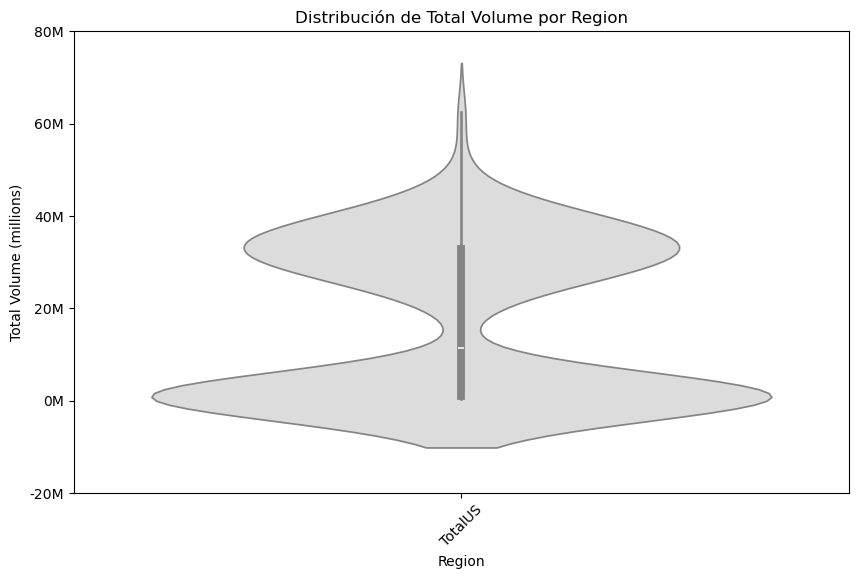

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar los datos por 'region' y calcular Total Volume
df_grouped = df_filtered.groupby(['region'], as_index=False)['Total Volume'].sum()

print("\nFirst Few Rows:\n", df_grouped.head(50))

# Crear gráfico de violín usando los datos originales
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_filtered, x='region', y='Total Volume', palette='coolwarm')

# Configuración del gráfico
plt.title('Distribución de Total Volume por Region')
plt.xlabel('Region')
plt.ylabel('Total Volume (millions)')

# Convertir Total Volume a millones para el eje y
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(tick/1_000_000)}M' for tick in plt.yticks()[0]])

plt.xticks(rotation=45)  # Rotar las etiquetas
plt.show()


/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_69605/2652477049.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()
/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_69605/2652477049.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=monthly_average_price, x='year', y='AveragePrice', palette='coolwarm')


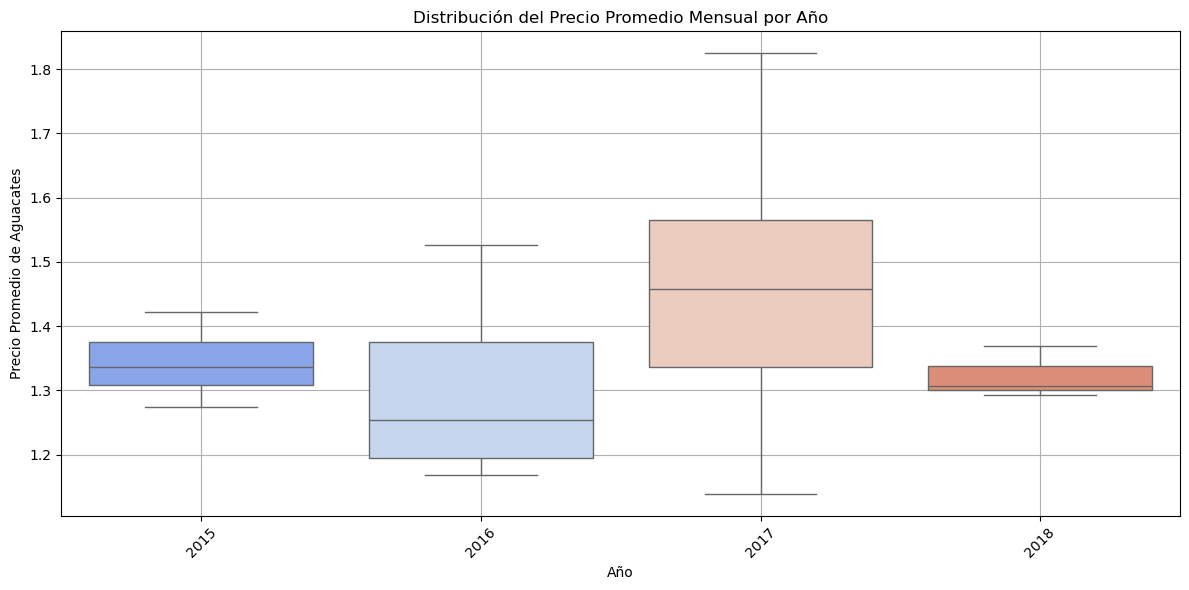

In [4]:
# Conversión de 'Date' a tipo datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Agrupar los datos por mes y calcular el precio promedio
monthly_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='M'))['AveragePrice'].mean().reset_index()

# Agregar una columna 'year' para mostrar solo el año
monthly_average_price['year'] = monthly_average_price['Date'].dt.year

# Crear el gráfico boxplot con los precios promedio mensuales agrupados por año
plt.figure(figsize=(12, 6))
sns.boxplot(data=monthly_average_price, x='year', y='AveragePrice', palette='coolwarm')

# Configuración del gráfico
plt.title('Distribución del Precio Promedio Mensual por Año')
plt.xlabel('Año') 
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility
plt.grid(True)  # Optional: Add grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

21986.87


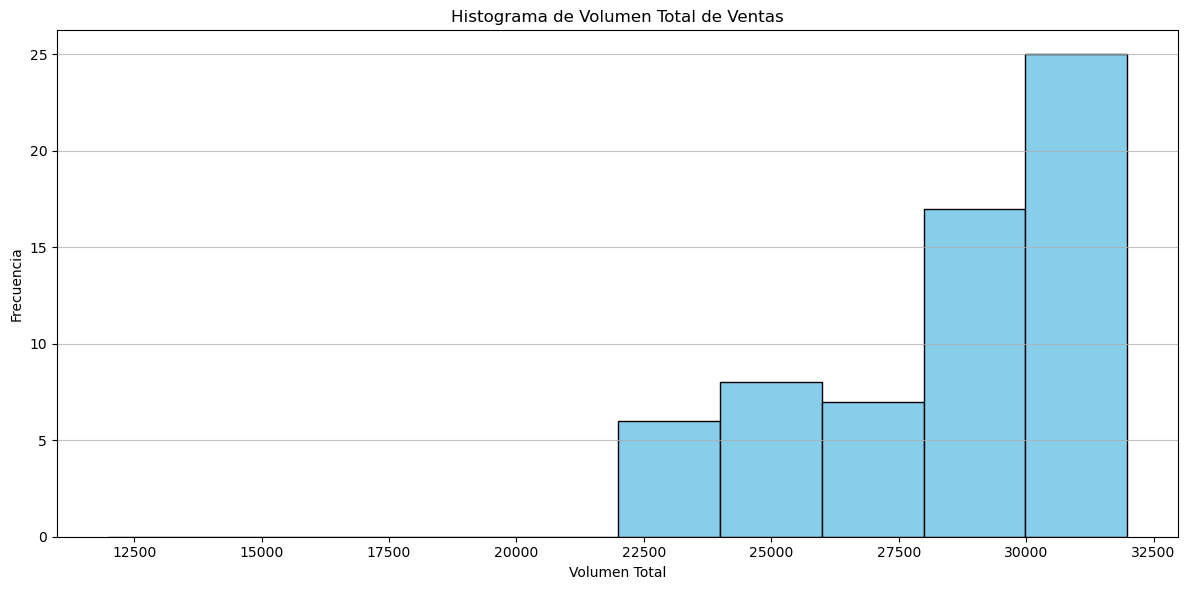

In [5]:
most_frequent_value = df_filtered['Total Volume'].mode()[0]# Get the most repetitive value
print(most_frequent_value)
# Determine a range around the most frequent value
range_min = max(0, most_frequent_value -10000)
range_max = most_frequent_value + 10000

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(df_filtered['Total Volume'], bins=10, color='skyblue', edgecolor='black', range=(range_min, range_max))  # Adjust bins as needed

# Configuración del gráfico
plt.title('Histograma de Volumen Total de Ventas')
plt.xlabel('Volumen Total')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)  # Optional: Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

{'Total Bags': 1638600782.2499998, 'Small Bags': 1243561254.2700002, 'Large Bags': 373584295.4100001, 'XLarge Bags': 21455232.57}


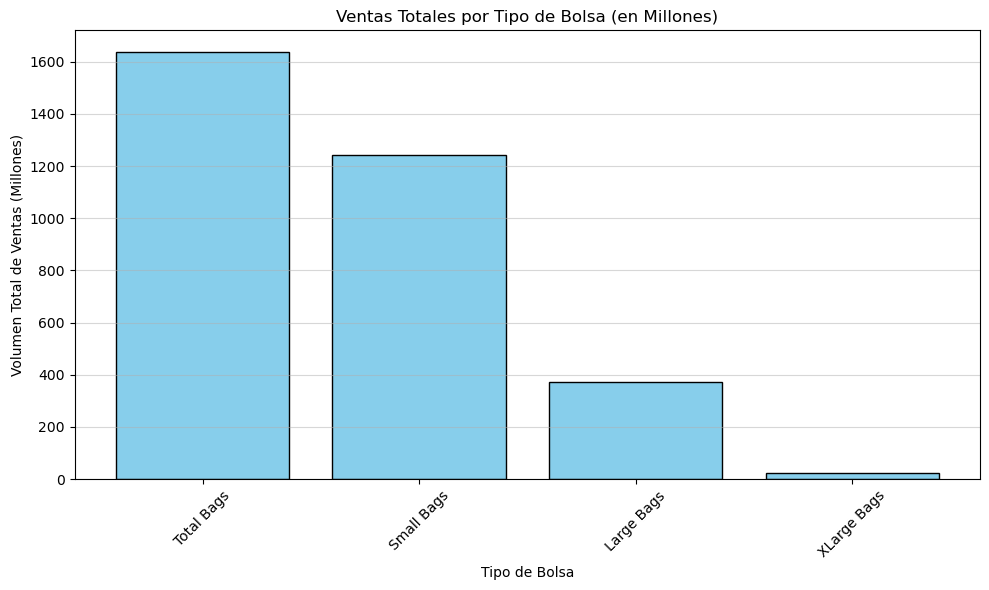

In [6]:
# Sumar los volúmenes de ventas para cada tipo de bolsa
bag_sales = {
    'Total Bags': df_filtered['Total Bags'].sum(),
    'Small Bags': df_filtered['Small Bags'].sum(),
    'Large Bags': df_filtered['Large Bags'].sum(),
    'XLarge Bags': df_filtered['XLarge Bags'].sum()
}
print(bag_sales)

# Extraer etiquetas y valores
bag_types = list(bag_sales.keys())
sales_values_millions = [value / 1_000_000 for value in bag_sales.values()]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(bag_types, sales_values_millions, color='skyblue', edgecolor='black')

# Configuración del gráfico
plt.title('Ventas Totales por Tipo de Bolsa (en Millones)')
plt.xlabel('Tipo de Bolsa')
plt.ylabel('Volumen Total de Ventas (Millones)')
plt.xticks(rotation=45)  # Rotación de etiquetas para mayor claridad
plt.grid(axis='y', alpha=0.5)  # Agregar líneas de cuadrícula en el eje y

# Mostrar el gráfico
plt.tight_layout()
plt.show()

/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_69605/3256494146.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='Y'))['AveragePrice'].mean().reset_index()


   year  AveragePrice
0  2015      1.342452
1  2016      1.303209
2  2017      1.468573
3  2018      1.323281


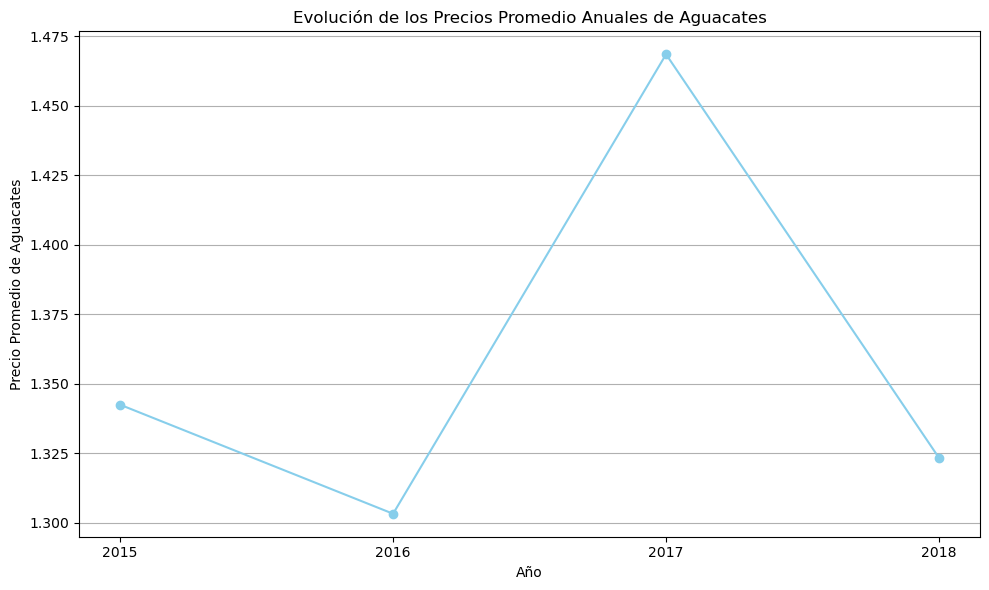

In [7]:
# Groupby Año
annual_average_price = df_filtered.groupby(pd.Grouper(key='Date', freq='Y'))['AveragePrice'].mean().reset_index()

# Agregar una columna 'year' para mostrar solo el año
annual_average_price['year'] = annual_average_price['Date'].dt.year

# Mostrar el resultado
print(annual_average_price[['year', 'AveragePrice']])

# Gráfico de Líneas de Precios Promedios por Año
plt.figure(figsize=(10, 6))
plt.plot(annual_average_price['year'], annual_average_price['AveragePrice'], marker='o', linestyle='-', color='skyblue')

# Configuración del gráfico
plt.title('Evolución de los Precios Promedio Anuales de Aguacates')
plt.xlabel('Año')
plt.ylabel('Precio Promedio de Aguacates')
plt.xticks(annual_average_price['year'])  # Mostrar cada año en el eje x
plt.grid(axis='y')
plt.tight_layout()  # Ajustar el layout
plt.show()
